#Загрузка необходимых библиотек

In [ ]:
import numpy as np #1.23.5
print ('numpy ' + str(np.__version__))
import pandas as pd #1.5.3
print ('pandas ' + str(pd.__version__))
import seaborn as sns
print ('seaborn ' + str(sns.__version__))
import matplotlib
print ('matplotlib ' + str(matplotlib.__version__))
import matplotlib.pyplot as plt

%matplotlib inline

numpy 1.23.5
pandas 1.5.3
seaborn 0.12.2
matplotlib 3.7.1


#Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
data = pd.read_parquet('/content/gdrive/My Drive/Colab Notebooks/Alfa/train.parquet')

Mounted at /content/gdrive/


In [ ]:
data

,id,rko_start_months,max_end_fact_fin_deals,max_end_plan_non_fin_deals,max_start_fin_deals,max_start_non_fin_deals,min_end_fact_fin_deals,min_end_plan_non_fin_deals,min_start_fin_deals,min_start_non_fin_deals,...,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,target_1,target_2,total_target
0,0,-1.279132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.352516,-0.081310,0.210189,1.140808,0.647477,0.810887,1.909568,0,0,0
1,1,-1.142591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188287,-0.650616,-0.316563,-1.136536,-0.127326,-0.147319,-0.517805,0,0,0
2,2,1.812270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,0.632731,2.541558,3.017482,0.033394,0.019972,0.578428,0,0,0
3,3,-0.479407,NaN,0.356677,NaN,-0.332867,NaN,-0.704164,NaN,0.905748,...,-0.323487,-0.003549,-0.219016,0.228624,-0.428185,-0.220932,-0.596108,0,0,0
4,4,-1.503690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,0.182726,-0.287299,-0.528921,-0.563335,-0.021506,-0.361201,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,0.140494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082114,0.276906,0.346755,1.535162,0.718633,-0.242059,-0.047991,0,0,0
299996,299996,-0.578334,NaN,-0.773909,NaN,0.182200,NaN,-0.690771,NaN,-0.519096,...,-0.323487,-0.264553,-0.316563,-0.472916,-0.053175,0.222753,-0.596108,0,0,0
299997,299997,2.052711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,0.139359,-0.316563,-0.768966,-0.115407,-0.054465,-0.047991,0,0,0
299998,299998,1.051685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188287,-0.122459,-0.316563,-0.317586,0.829699,-0.416806,-0.596108,0,1,1


#Попытка найти фичи с помощью VarianceThreshold

In [ ]:
train = pd.DataFrame()
train = data.drop(columns = ['target_1', 'target_2', 'total_target'], axis=1).copy()

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold()
selector.fit_transform(train)

array([[0, -1.279132465621923, nan, ..., 0.6474772356797882,
        0.8108867891452255, 1.9095684803604331],
       [1, -1.1425905728375794, nan, ..., -0.12732578020800944,
        -0.1473194613329735, -0.517805272788803],
       [2, 1.8122701788355633, nan, ..., 0.03339432191675351,
        0.01997184156128228, 0.5784280350850456],
       ...,
       [299997, 2.052710893971235, nan, ..., -0.11540738478919486,
        -0.054465006815522264, -0.047990997985725016],
       [299998, 1.0516853884155206, nan, ..., 0.8296991236007705,
        -0.41680561713312125, -0.5961076519226493],
       [299999, -0.6423571539421735, nan, ..., 0.6159009295457853,
        -0.21398244687754653, -0.047990997985725016]], dtype=object)

#Удаление данных, если считать выбросами все точки, выходящие за пределы трёх сигм. (Привело к уменььшению ROC-AUC)

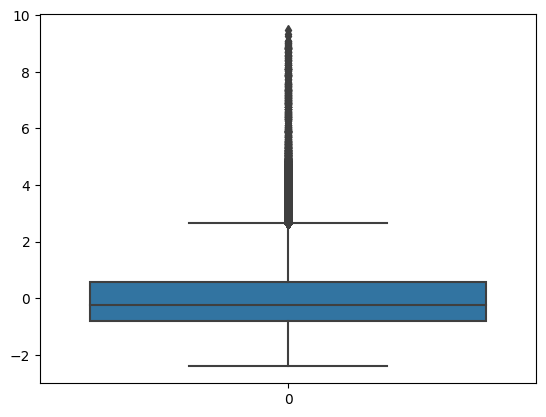

In [ ]:
sns.boxplot(data['rko_start_months']);

In [ ]:
def outliers_indices(feature):

    mid = data[feature].mean()
    sigma = data[feature].std()
    return data[(data[feature] < mid - 3*sigma) | (data[feature] > mid + 3*sigma)].index

In [ ]:
wrong_rko = outliers_indices('rko_start_months')

In [ ]:
len(wrong_rko)

2986

In [ ]:
data.drop(wrong_rko, inplace=True)

#Построение графиков pairplot для target2

In [ ]:
data10 = pd.DataFrame()
data10 = data.iloc [:, 0:10]

In [ ]:
data10['target_2'] = data[['target_2']].copy()

In [ ]:
data10.describe()

,id,rko_start_months,max_end_fact_fin_deals,max_end_plan_non_fin_deals,max_start_fin_deals,max_start_non_fin_deals,min_end_fact_fin_deals,min_end_plan_non_fin_deals,min_start_fin_deals,min_start_non_fin_deals,target_2
count,297014.000000,296958.000000,36201.000000,12312.000000,36201.000000,12316.000000,36201.000000,12312.000000,36201.000000,12316.000000,297014.000000
mean,149978.353643,-0.040693,-0.002813,0.007044,-0.004946,0.000840,-0.006191,0.005095,-0.008198,0.002519,0.026793
std,86592.241701,0.949134,1.068907,0.998747,1.024522,0.989853,1.035250,1.031615,1.027703,1.026403,0.161479
min,0.000000,-2.412517,-2.755429,-1.614714,-1.865545,-1.113156,-2.718270,-2.633134,-2.565385,-2.242403,0.000000
25%,74993.250000,-0.793718,-0.727190,-0.600479,-0.618100,-0.847935,-0.905144,-0.705036,-0.801838,-0.824311,0.000000
50%,149978.500000,-0.253696,-0.320128,0.018599,-0.339789,-0.167585,-0.053290,0.008487,-0.130325,-0.140679,0.000000
75%,224967.750000,0.554068,0.415690,0.606943,0.201039,0.539672,0.977148,0.623998,0.461665,0.611682,0.000000
max,299999.000000,3.103739,4.440327,6.775771,8.025604,11.075494,2.522548,7.396264,6.353565,10.018776,1.000000


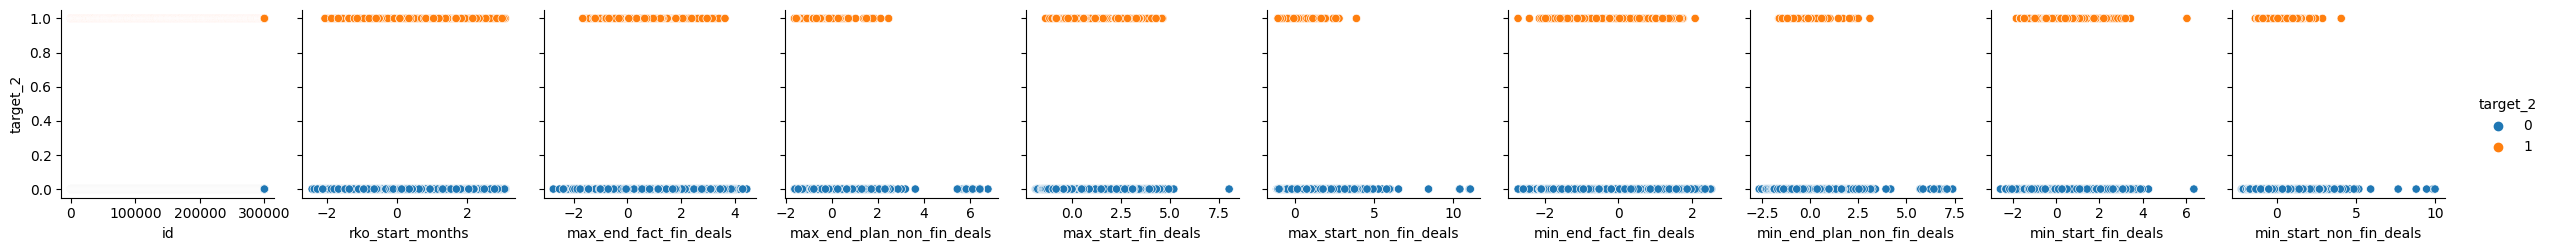

In [ ]:
sns.pairplot(data10, y_vars=["target_2"], x_vars=data10.columns.drop("target_2"), hue='target_2')

In [ ]:
data1020 = pd.DataFrame()
data1020 = data.iloc [:, 10:20]
data1020['target_2'] = data[['target_2']].copy()
data1020

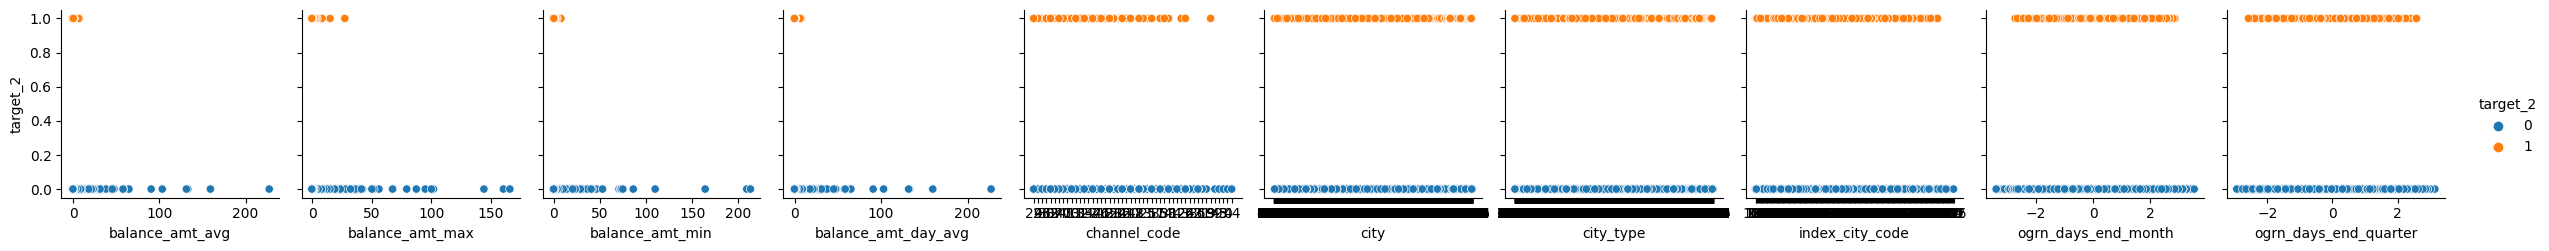

In [ ]:
sns.pairplot(data1020, y_vars=["target_2"], x_vars=data1020.columns.drop("target_2"), hue='target_2')

In [ ]:
data2030 = pd.DataFrame()
data2030 = data.iloc [:, 20:30]
data2030['target_2'] = data[['target_2']].copy()
data2030

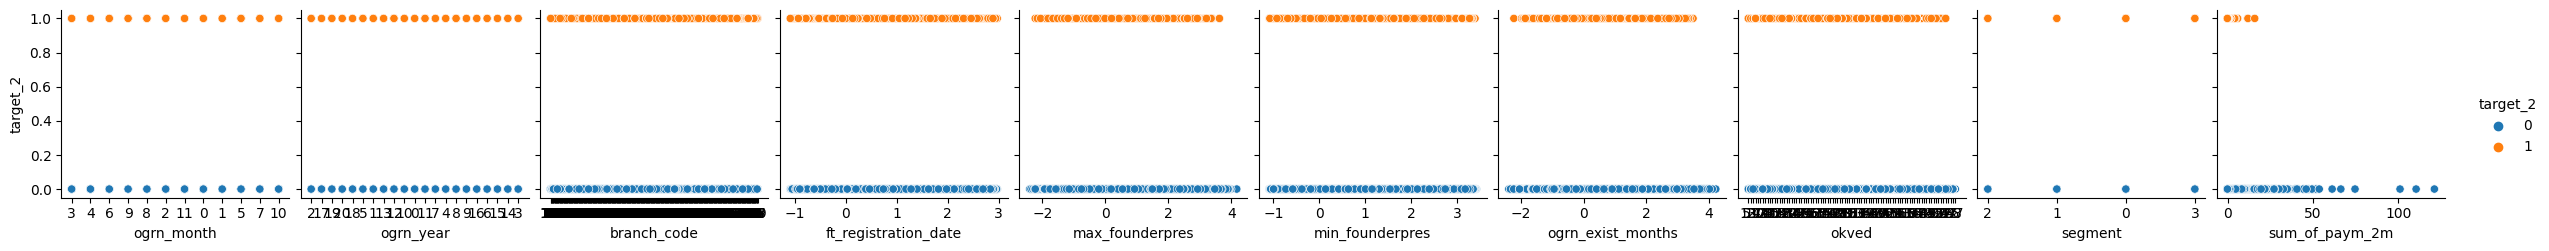

In [ ]:
sns.pairplot(data2030, y_vars=["target_2"], x_vars=data2030.columns.drop("target_2"), hue='target_2')

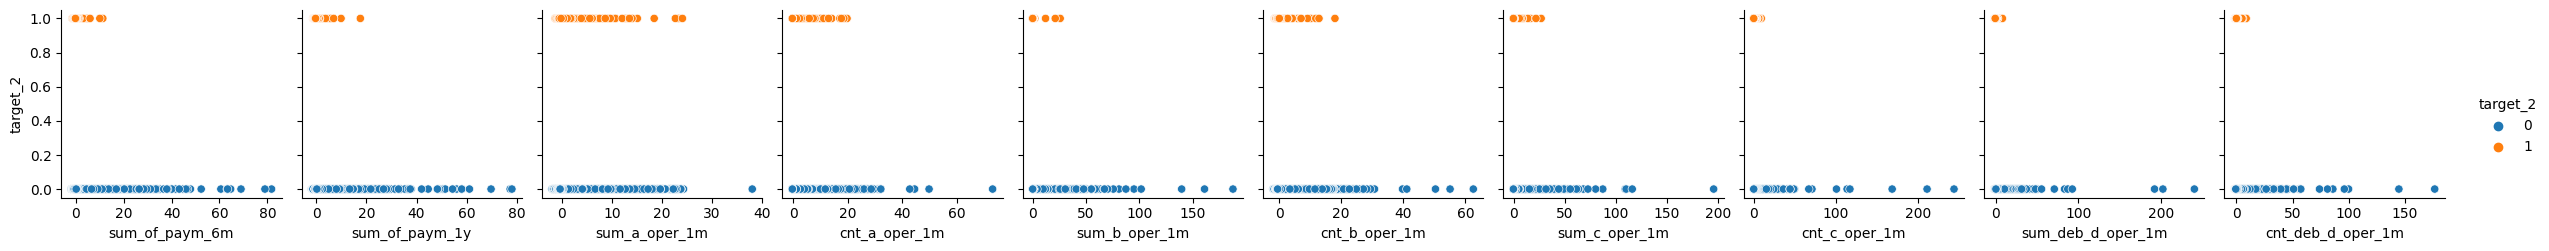

In [ ]:
data3040 = pd.DataFrame()
data3040 = data.iloc [:, 30:40]
data3040['target_2'] = data[['target_2']].copy()
data3040
sns.pairplot(data3040, y_vars=["target_2"], x_vars=data3040.columns.drop("target_2"), hue='target_2')

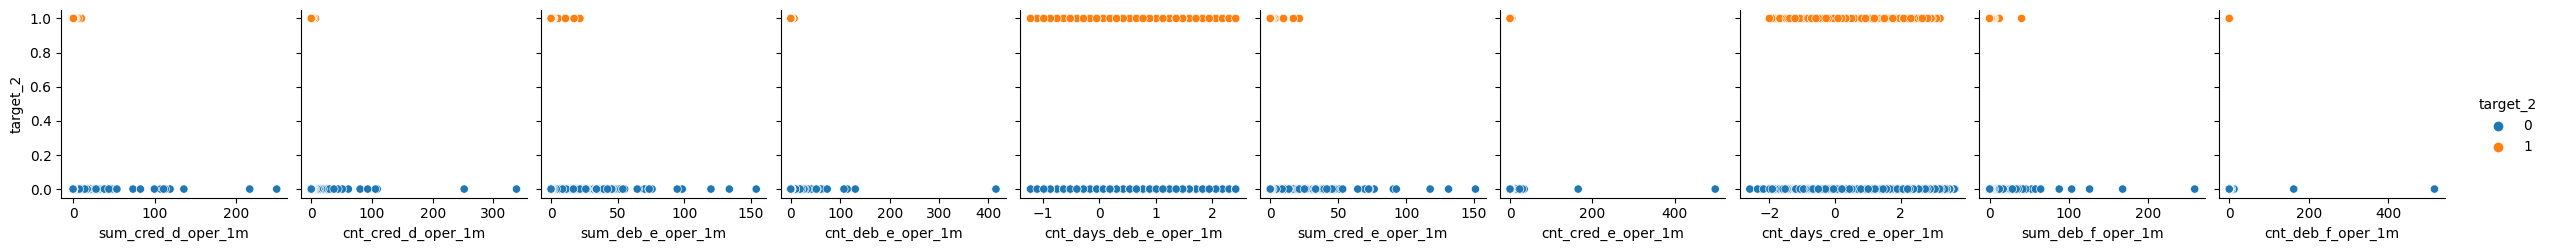

In [ ]:
data4050 = pd.DataFrame()
data4050 = data.iloc [:, 40:50]
data4050['target_2'] = data[['target_2']].copy()

sns.pairplot(data4050, y_vars=["target_2"], x_vars=data4050.columns.drop("target_2"), hue='target_2')

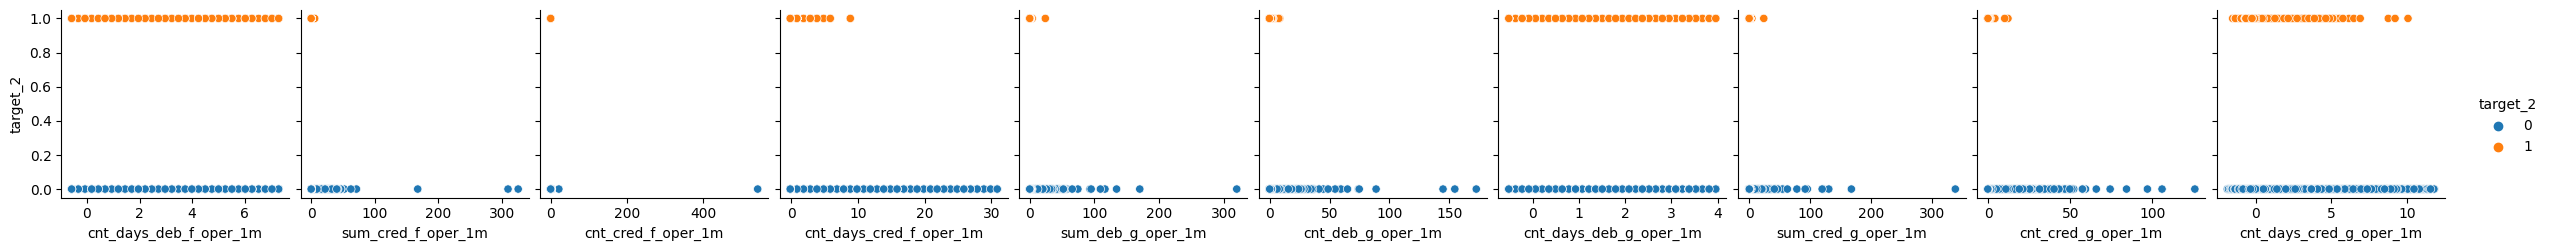

In [ ]:
data5060 = pd.DataFrame()
data5060 = data.iloc [:, 50:60]
data5060['target_2'] = data[['target_2']].copy()

sns.pairplot(data5060, y_vars=["target_2"], x_vars=data5060.columns.drop("target_2"), hue='target_2')

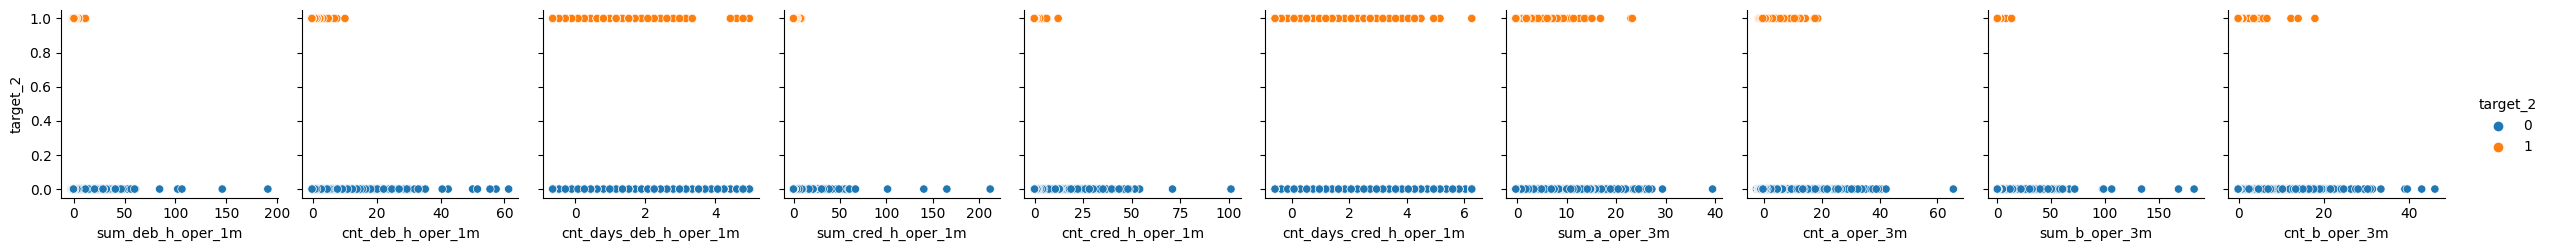

In [ ]:
data6070 = pd.DataFrame()
data6070 = data.iloc [:, 60:70]
data6070['target_2'] = data[['target_2']].copy()

sns.pairplot(data6070, y_vars=["target_2"], x_vars=data6070.columns.drop("target_2"), hue='target_2')

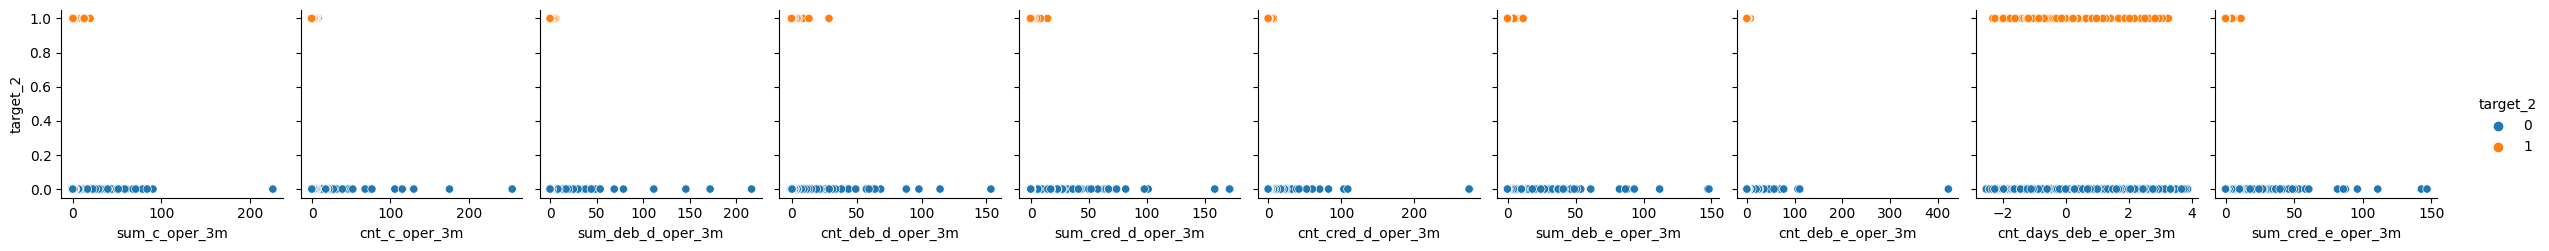

In [ ]:
data7080 = pd.DataFrame()
data7080 = data.iloc [:, 70:80]
data7080['target_2'] = data[['target_2']].copy()

sns.pairplot(data7080, y_vars=["target_2"], x_vars=data7080.columns.drop("target_2"), hue='target_2')

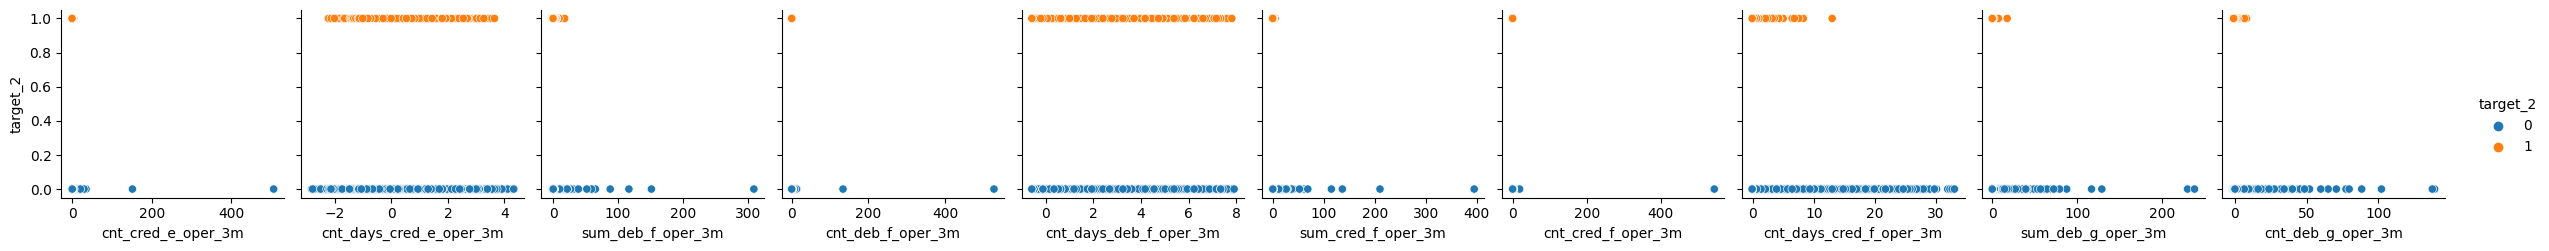

In [ ]:
data8090 = pd.DataFrame()
data8090 = data.iloc [:, 80:90]
data8090['target_2'] = data[['target_2']].copy()

sns.pairplot(data8090, y_vars=["target_2"], x_vars=data8090.columns.drop("target_2"), hue='target_2')

In [ ]:
data90100 = pd.DataFrame()
data90100 = data.iloc [:, 90:100]
data90100['target_2'] = data[['target_2']].copy()
data90100


,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,target_2
0,-0.412801,-0.045464,0.017469,0.352516,-0.081310,0.210189,1.140808,0.647477,0.810887,1.909568,0
1,-0.514610,0.124791,-0.101828,-0.188287,-0.650616,-0.316563,-1.136536,-0.127326,-0.147319,-0.517805,0
2,0.808901,0.009112,-0.131653,-0.323487,0.632731,2.541558,3.017482,0.033394,0.019972,0.578428,0
3,1.572465,-0.402637,-0.131653,-0.323487,-0.003549,-0.219016,0.228624,-0.428185,-0.220932,-0.596108,0
4,-0.514610,0.388730,-0.131653,-0.323487,0.182726,-0.287299,-0.528921,-0.563335,-0.021506,-0.361201,0
...,...,...,...,...,...,...,...,...,...,...,...
299995,-0.361897,-0.060810,-0.042180,0.082114,0.276906,0.346755,1.535162,0.718633,-0.242059,-0.047991,0
299996,-0.514610,0.410615,-0.131653,-0.323487,-0.264553,-0.316563,-0.472916,-0.053175,0.222753,-0.596108,0
299997,-0.158280,0.034277,-0.131653,-0.323487,0.139359,-0.316563,-0.768966,-0.115407,-0.054465,-0.047991,0
299998,-0.412801,-0.561080,-0.101828,-0.188287,-0.122459,-0.316563,-0.317586,0.829699,-0.416806,-0.596108,1


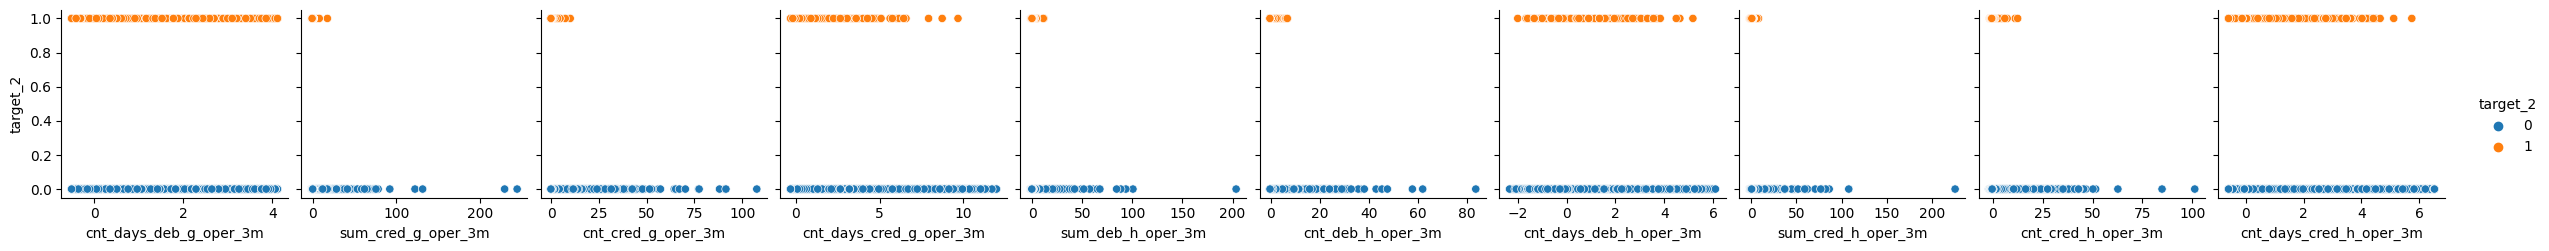

In [ ]:
sns.pairplot(data90100, y_vars=["target_2"], x_vars=data90100.columns.drop("target_2"), hue='target_2')

In [ ]:
data.isnull().sum().to_frame() #подсчет пропущенных значений в данных

,0
id,0
rko_start_months,56
max_end_fact_fin_deals,263086
max_end_plan_non_fin_deals,287521
max_start_fin_deals,263086
...,...
cnt_cred_h_oper_3m,3131
cnt_days_cred_h_oper_3m,3131
target_1,0
target_2,0


#Подбор параметров

In [ ]:
cat_cols = [
    'channel_code', 'city', 'city_type',
    'index_city_code', 'ogrn_month', 'ogrn_year',
    'branch_code', 'okved', 'segment'
]

In [ ]:
cat_cols = ['branch_code']

In [ ]:
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
data2 = pd.DataFrame()
data2['rko_start_months'] = data['rko_start_months']
data2['ft_registration_date'] = data['ft_registration_date']

data2['ogrn_exist_months'] = data['ogrn_exist_months']
data2['cnt_days_deb_e_oper_1m'] = data['cnt_days_deb_e_oper_1m']

data2['cnt_days_cred_e_oper_1m'] = data['cnt_days_cred_e_oper_1m']
data2['cnt_days_deb_f_oper_1m'] = data['cnt_days_deb_f_oper_1m']
data2['cnt_days_deb_g_oper_1m'] = data['cnt_days_deb_g_oper_1m']
data2['cnt_days_deb_h_oper_1m'] = data['cnt_days_deb_h_oper_1m']


In [ ]:
data2['cnt_days_cred_h_oper_1m'] = data['cnt_days_cred_h_oper_1m']
data2['cnt_days_deb_e_oper_3m'] = data['cnt_days_deb_e_oper_3m']
data2['cnt_days_cred_e_oper_3m'] = data['cnt_days_cred_e_oper_3m']
data2['cnt_days_deb_f_oper_3m'] = data['cnt_days_deb_f_oper_3m']
data2['cnt_days_deb_g_oper_3m'] = data['cnt_days_deb_g_oper_3m']
data2['cnt_days_deb_h_oper_3m'] = data['cnt_days_deb_h_oper_3m']
data2['cnt_days_cred_h_oper_3m'] = data['cnt_days_cred_h_oper_3m']

In [ ]:
data2['target_1'] = data['target_1']

In [ ]:
data2 = data2.drop(columns = ['rko_start_months', 'ft_registration_date'],axis = 1)  #data2 бесполезные столбцы, data3 все,кроме бесполезных столбцов

In [ ]:
data3 = data.copy()

In [ ]:
data3 = data3.drop(columns = ['sum_a_oper_1m', 'cnt_a_oper_1m', 'sum_b_oper_1m', 'cnt_b_oper_1m', 'sum_c_oper_1m', 'cnt_c_oper_1m',
                              'sum_deb_d_oper_1m', 'cnt_deb_d_oper_1m', 'sum_cred_d_oper_1m', 'cnt_cred_d_oper_1m', 'sum_deb_e_oper_1m',
                              'cnt_deb_e_oper_1m', 'cnt_days_deb_e_oper_1m', 'sum_cred_e_oper_1m', 'cnt_cred_e_oper_1m', 'cnt_days_cred_e_oper_1m',
                              'sum_deb_f_oper_1m', 'cnt_deb_f_oper_1m', 'cnt_days_deb_f_oper_1m', 'sum_cred_f_oper_1m', 'cnt_cred_f_oper_1m',
                              'cnt_days_cred_f_oper_1m', 'sum_deb_g_oper_1m', 'cnt_deb_g_oper_1m', 'cnt_days_deb_g_oper_1m', 'sum_cred_g_oper_1m',
                              'cnt_cred_g_oper_1m', 'cnt_days_cred_g_oper_1m', 'sum_deb_h_oper_1m', 'cnt_deb_h_oper_1m', 'cnt_days_deb_h_oper_1m',
                              'sum_cred_h_oper_1m', 'cnt_cred_h_oper_1m', 'cnt_days_cred_h_oper_1m', 'id'])

(14.5, -0.5)

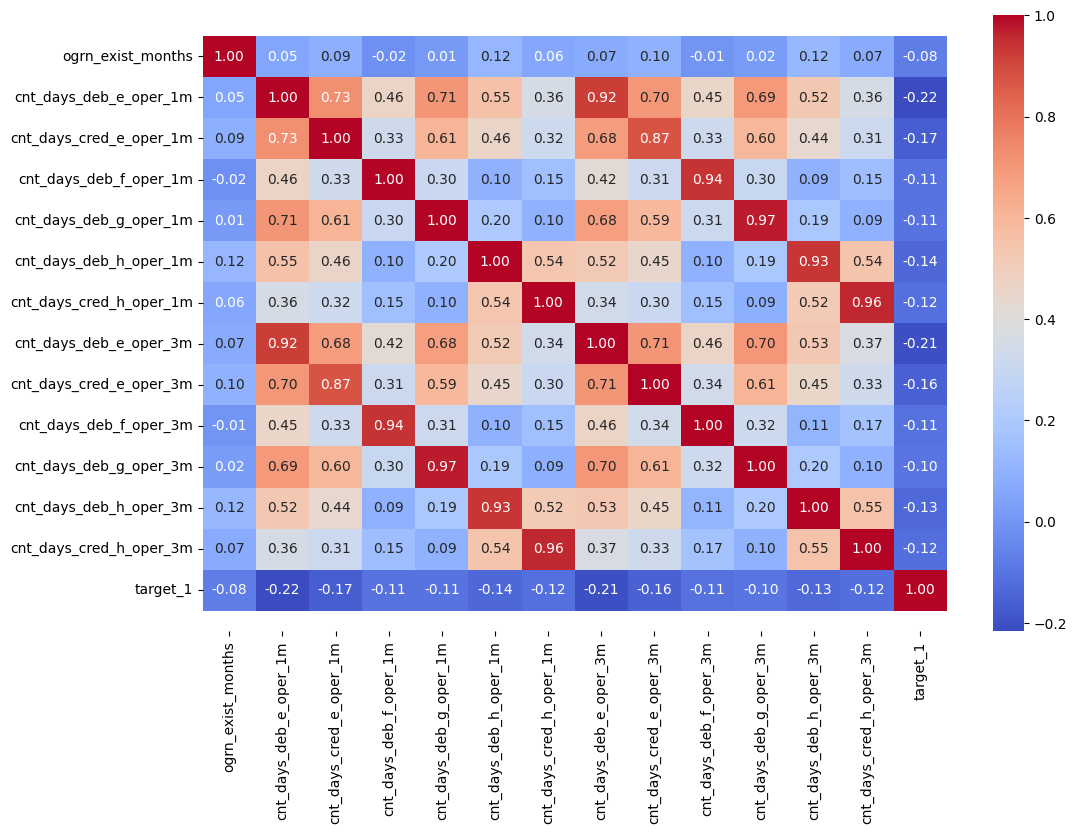

In [ ]:
import seaborn as sns
import warnings

plt.figure(figsize = (12,8))
ax = sns.heatmap(data2.corr(), annot = True, fmt = ".2f", cmap="coolwarm")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [ ]:
data2

,ogrn_exist_months,cnt_days_deb_e_oper_1m,cnt_days_cred_e_oper_1m,cnt_days_deb_f_oper_1m,cnt_days_deb_g_oper_1m,cnt_days_deb_h_oper_1m,cnt_days_cred_h_oper_1m,cnt_days_deb_e_oper_3m,cnt_days_cred_e_oper_3m,cnt_days_deb_f_oper_3m,cnt_days_deb_g_oper_3m,cnt_days_deb_h_oper_3m,cnt_days_cred_h_oper_3m,target_1
0,-0.879679,0.186476,0.719134,-0.583742,-0.373146,1.170461,1.399476,0.460835,0.460157,-0.502609,-0.412801,1.140808,1.909568,0
1,-0.499765,-0.636622,-0.464679,0.178735,-0.517649,-0.637457,-0.368196,-0.973668,-0.632675,-0.315478,-0.514610,-1.136536,-0.517805,0
2,0.264662,1.009573,-0.210338,-0.583742,0.493873,2.255211,0.073722,1.020779,0.368406,-0.409044,0.808901,3.017482,0.578428,0
3,1.538181,1.244744,1.053395,-0.583742,1.649899,0.447294,-0.589155,1.575653,-0.648297,-0.596175,1.572465,0.228624,-0.596108,0
4,-1.307176,-0.283866,-0.166435,0.687054,-0.517649,-0.275873,-0.589155,-0.250332,-0.896137,0.433046,-0.514610,-0.528921,-0.361201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-0.923123,0.186476,0.210977,-0.583742,-0.228643,1.351253,0.515640,-0.193836,-0.661330,-0.596175,-0.361897,1.535162,-0.047991,0
299996,0.412151,-0.989378,-0.667418,-0.583742,-0.517649,-0.637457,-0.589155,-1.096033,-0.869554,-0.596175,-0.514610,-0.472916,-0.596108,0
299997,0.646429,-0.401451,-0.506442,0.178735,-0.084140,-0.637457,0.073722,-0.589603,-0.042897,-0.128347,-0.158280,-0.768966,-0.047991,0
299998,2.728104,-0.989378,-0.270525,-0.583742,-0.228643,-0.637457,-0.589155,-1.180636,-1.010305,-0.596175,-0.412801,-0.317586,-0.596108,0


#Разделение на test и train

In [ ]:
from sklearn.model_selection import train_test_split

y = data['target_1'].copy()

X = data[['ogrn_exist_months', 'cnt_days_deb_e_oper_1m', 'cnt_days_cred_e_oper_1m', 'cnt_days_deb_f_oper_1m',
          'cnt_days_deb_g_oper_1m', 'cnt_days_deb_h_oper_1m', 'cnt_days_cred_h_oper_1m', 'cnt_days_deb_e_oper_3m',
          'cnt_days_cred_e_oper_3m', 'cnt_days_deb_f_oper_3m', 'cnt_days_deb_g_oper_3m', 'cnt_days_deb_h_oper_3m',
          'cnt_days_cred_h_oper_3m']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

In [ ]:
y_train.isnull().sum()

0

In [ ]:
y_train[y_train.isnull()]

#Поиск оптимальных параметров

In [ ]:
from sklearn.model_selection import GridSearchCV

def search(X, y, model, param_name, grid, draw=True):
  parameters = {param_name: grid}

  CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
  CV_model.fit(X, y)
  means = CV_model.cv_results_['mean_test_score']
  error = CV_model.cv_results_['std_test_score']

  if draw:
    plt.figure(figsize=(15,8))
    plt.title('choose ' + param_name)

    plt.plot(grid, means, label='mean values of score')

    plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
    plt.legend()
    plt.xlabel('parameter')
    plt.ylabel('r2')
    plt.show()

  return means, error

In [ ]:
X_train

,ogrn_exist_months,cnt_days_deb_e_oper_1m,cnt_days_cred_e_oper_1m,cnt_days_deb_f_oper_1m,cnt_days_deb_g_oper_1m,cnt_days_deb_h_oper_1m,cnt_days_cred_h_oper_1m,cnt_days_deb_e_oper_3m,cnt_days_cred_e_oper_3m,cnt_days_deb_f_oper_3m,cnt_days_deb_g_oper_3m,cnt_days_deb_h_oper_3m,cnt_days_cred_h_oper_3m
12811,0.703258,-0.989378,-0.991602,-0.583742,-0.517649,-0.637457,-0.368196,-1.132264,-1.068047,-0.596175,-0.514610,-0.573430,-0.517805
179834,-1.099044,2.420598,2.154638,4.245281,3.961950,0.447294,2.946190,2.156223,3.184320,3.988538,3.914062,0.430039,3.162407
39082,-1.285906,-1.106963,-0.585932,-0.583742,-0.517649,-0.456665,-0.589155,-1.105121,-1.494143,-0.596175,-0.514610,-0.415838,-0.596108
236537,-0.758575,2.420598,1.864835,5.261917,3.961950,-0.456665,0.294681,2.321424,1.942583,5.017759,3.761349,-0.448790,0.186916
260808,-0.129589,-1.106963,-0.913439,-0.583742,-0.517649,-0.637457,-0.368196,-1.044191,-0.267591,-0.596175,-0.514610,-1.040332,-0.517805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299741,-0.841550,-0.519036,-1.079229,-0.583742,-0.517649,-0.275873,-0.589155,-0.540284,-0.821771,-0.596175,-0.514610,0.255752,-0.596108
9372,2.677655,0.068890,-1.018878,-0.329583,-0.228643,0.447294,-0.368196,-0.011942,-0.294632,-0.409044,0.096241,0.360057,0.578428
105595,2.566993,-1.224548,-0.593137,-0.583742,-0.517649,-0.637457,-0.589155,-1.659513,-0.956226,-0.596175,-0.514610,-0.522066,-0.596108
93553,-0.370545,-0.401451,-0.698268,-0.583742,-0.517649,-0.456665,-0.589155,-0.169042,-0.093342,-0.315478,-0.412801,-0.582890,-0.596108


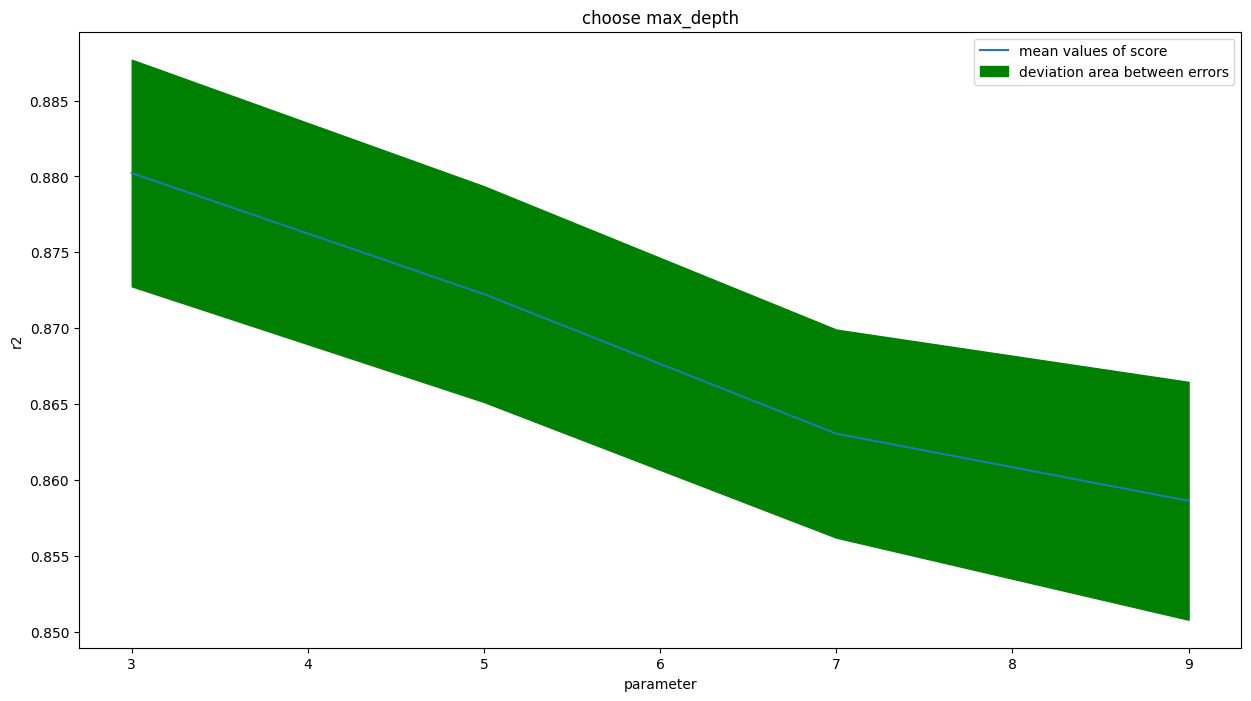

In [ ]:
import xgboost

models = [xgboost. XGBClassifier(n_estimators=400)]
param_names = ['max_depth']
grids = [np.arange(3,10,2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, param_names, grids, param_scales):
  search(X_train, y_train, model, param_name, grid, param_scale)

#Обучение моделей и оценка качества модели

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=10)

In [ ]:
xg_model = xgboost.XGBClassifier(max_depth=3, n_estimators=400).fit(X_train, y_train)
#plot_roc_curve(model, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test, y_pred)
#y_pred = rf_model.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.5055023423560988


In [ ]:
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test) [:, 1]

Train roc-auc: 0.9078082847262692
Test roc-auc: 0.8760204440140905


NameError: ignored

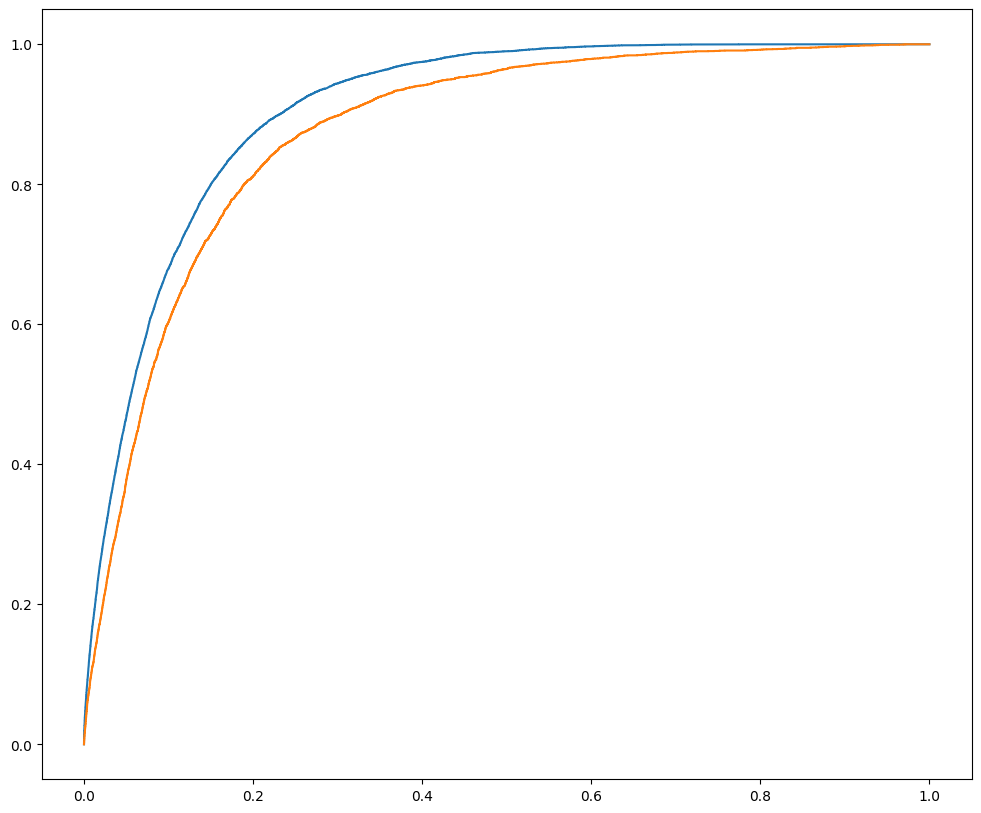

In [ ]:
plt.figure(figsize=(12,10))

print(f'Train roc-auc: {roc_auc_score (y_train, y_train_proba)}')
print(f'Test roc-auc: {roc_auc_score (y_test, y_test_proba)}')

plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

plt.plot([0,1], [0,1], linestyle-'--', color='black')
plt.grid(True)
plt.legend()
plt.show()